# Assignment4

Course: AP3021

Student Number: 109601003

Name: 林群賀

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os

### 4-1.1:

Locate the first nontrivial root of $sin(x) = x^3$ where x is in radians. 
1. Graphical technique (Python)
2. Bisection program (𝑥𝑙 = 0.5, 𝑥𝑢 = 1, 𝑤h𝑒𝑛 𝜀𝑎 < 𝜀𝑠 = 2%) (Python)


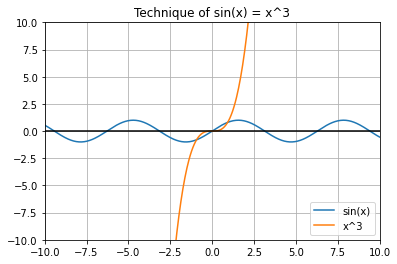

In [43]:
# plot y = sin(x) and y = x^3

x = np.linspace(-10, 10, 500)
y1 = np.sin(x)
y2 = x ** 3

plt.plot(x, y1)
plt.plot(x, y2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.title("Technique of sin(x) = x^3")
plt.grid()
plt.legend(["sin(x)", "x^3"], loc ="lower right")
plt.axhline(y = 0, color='k', linestyle='-')

plt.savefig("./src/imgs/A4_1_a-1.png", dpi=300)

plt.show()

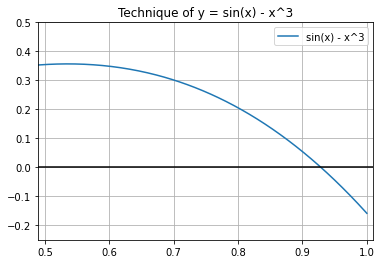

In [44]:
# plot y = sin(x) - x ^ 3
# set xl = 0.5; xu = 1.0

x = np.linspace(0.0, 1.0, 500)
y = np.sin(x) - x ** 3

plt.plot(x, y)

plt.xlim(0.49, 1.01)
plt.ylim(-0.25, 0.5)

plt.title("Technique of y = sin(x) - x^3")
plt.grid()
plt.legend(["sin(x) - x^3"], loc ="upper right")
plt.axhline(y = 0, color='k', linestyle='-')

plt.savefig("./src/imgs/A4_1_a-2.png", dpi=300)

plt.show()

In [178]:
# Bisection Program

def f(x) :
    ans = np.sin(x) - x ** 3
    return ans

def count_ea(new_x_root, old_x_root) :

    if (old_x_root == -1) : # jump out the first data.
        return 9999
    else :
        ea = abs((new_x_root - old_x_root) / new_x_root)
        ea = ea * 100   # turn into percent
    
    return ea

def bisection(x_lowwer, x_upper, es, x_root, iter_max) :
    iter_count = 0
    
    while True :
        last_x_root = x_root
        x_root = (x_lowwer + x_upper) / 2
        iter_count += 1
        ea = count_ea(x_root, last_x_root)
        temp = f(x_lowwer) * f(x_root)

        if (temp < 0) :
            x_upper = x_root
        elif(temp > 0) :
            x_lowwer = x_root
        else :
            ea = 0.0    
            # return x_root

        print("count:", iter_count, "root:", x_root, "ea:", ea)
        
        if ea < es or iter_count >= iter_max:
            return x_root

In [179]:
es = 2.0  # 2%
x_lowwer = 0.5
x_upper = 1.0
x_root = -1
iter_max = 500

ans = bisection(x_lowwer, x_upper, es, x_root, iter_max)

print("\nThe approximate ans:", ans)

count: 1 root: 0.75 ea: 9999
count: 2 root: 0.875 ea: 14.285714285714285
count: 3 root: 0.9375 ea: 6.666666666666667
count: 4 root: 0.90625 ea: 3.4482758620689653
count: 5 root: 0.921875 ea: 1.694915254237288

The approximate ans: 0.921875


## 4-1.2

Also perform an error check by substituting your final answer into the original equation in 1-2 (calculate true error 可不用打程式)

In [52]:
# Also perform an error check by substituting your final answer into the original equation in (b) 

def count_true_error(true_value, approximation) :
    return true_value - approximation

def count_et(true_value, approximation) :
    true_error = true_value - approximation
    et = (true_error / true_value) * 100

    return et

true_value = 0.9286263  # calculator

et = count_et(true_value, ans)
print("True error:", et)

True error: 20.07683822868252


### from the calculator

The root of $y = sin(x) - x^3$ is $−0.9286263, 0, 0.9286263$
![plot](./src/imgs/A4_1_b.png)

And from the previous conduction, true value is $0.9286263$ and the approximation is $0.7421875$.

Therefore we get the true percent error is $20.07683822868252\%$

## 4-2-1

How many bisection iterations would be required to determine temperature to an
absolute error of 0.05°C? (𝑥𝑙 = 0°C, 𝑥𝑢 = 40°C)

![plot](./src/imgs/A4_2_1.jpg)

## 4-2-2

延續(1). Bisection program. (𝑂𝑠𝑓 = 8, 10, 𝑎𝑛𝑑 12𝑚𝑔/𝐿) (Python) PS : 溫度請帶絕對溫標

In [219]:
def f(temperature, osf) :
    absolute_temperature = temperature + 273.15 # Ta

    ans = ((-8.621949 * 10 ** 11) / absolute_temperature ** 4) \
        + ((1.243800  * 10 ** 10) / absolute_temperature ** 3) \
        + ((-6.642308 * 10 **  7) / absolute_temperature ** 2) \
        + ((1.575701  * 10 **  5) / absolute_temperature)      \
        - 139.34411 - math.log(osf)
    
    return ans

def count_et(true_value, approximation) :
    true_error = true_value - approximation
    et = (true_error / true_value) * 100

    return et

def count_ea(new_x_root, old_x_root) :

    if (old_x_root == -1) : # jump out the first data.
        return 9999
    else :
        ea = abs((new_x_root - old_x_root) / new_x_root)
        ea = ea * 100   # turn into percent
        
        return ea


def count_iter_times(x_lowwer, x_upper, Ead) :
    iter_times = math.log(((x_upper - x_lowwer) / Ead), 2)

    return iter_times

def bisection(x_lowwer, x_upper, Ead, osf, iter_max, iter_count) :
    iter_times = count_iter_times(x_lowwer, x_upper, Ead)
    print("Iterator at least:", iter_times, "times.")
    x_root = -1
    
    while True :
        last_x_root = x_root
        x_root = (x_lowwer + x_upper) / 2
        iter_count += 1
        temp = f(x_lowwer, osf) * f(x_root, osf)
        # print(temp)

        if (temp < 0) :
            x_upper = x_root
            # print("here")
        elif(temp > 0) :
            x_lowwer = x_root
            # print("here2")
        else :
            return x_root

        # how to get the true_value?
        # true_value = 

        # et = (count_et(true_value, x_root))

        ea = count_ea(x_root, last_x_root)

        print("count:", iter_count, "root:", x_root, "ea", ea)
        # print(x_lowwer, x_upper)
        
        if iter_count >= iter_times or iter_count >= iter_max:
            temperature = x_root + 273.15
            
            print(f"if the os is {osf}\nI iterate {iter_count} times\nThe temperature is {temperature}K")
            return x_root

### Osf = 8

In [220]:
x_lowwer = 0
x_upper = 40
Ead = 0.05
osf = 8
iter_max = 500
iter_count = 0

ans = bisection(x_lowwer, x_upper, Ead, osf, iter_max, iter_count)

Iterator at least: 9.643856189774725 times.
count: 1 root: 20.0 ea 9999
count: 2 root: 30.0 ea 33.33333333333333
count: 3 root: 25.0 ea 20.0
count: 4 root: 27.5 ea 9.090909090909092
count: 5 root: 26.25 ea 4.761904761904762
count: 6 root: 26.875 ea 2.3255813953488373
count: 7 root: 26.5625 ea 1.1764705882352942
count: 8 root: 26.71875 ea 0.5847953216374269
count: 9 root: 26.796875 ea 0.2915451895043732
count: 10 root: 26.7578125 ea 0.145985401459854
if the os is 8
I iterate 10 times
The temperature is 299.9078125K


### Osf = 10

In [221]:
x_lowwer = 0
x_upper = 40
Ead = 0.05
osf = 10
iter_max = 500
iter_count = 0

print("Osf:", osf)
ans = bisection(x_lowwer, x_upper, Ead, osf, iter_max, iter_count)
# print(ans)

Osf: 10
Iterator at least: 9.643856189774725 times.
count: 1 root: 20.0 ea 9999
count: 2 root: 10.0 ea 100.0
count: 3 root: 15.0 ea 33.33333333333333
count: 4 root: 17.5 ea 14.285714285714285
count: 5 root: 16.25 ea 7.6923076923076925
count: 6 root: 15.625 ea 4.0
count: 7 root: 15.3125 ea 2.0408163265306123
count: 8 root: 15.46875 ea 1.0101010101010102
count: 9 root: 15.390625 ea 0.5076142131979695
count: 10 root: 15.3515625 ea 0.2544529262086514
if the os is 10
I iterate 10 times
The temperature is 288.5015625K


### Osf = 12

In [222]:
x_lowwer = 0
x_upper = 40
Ead = 0.05
osf = 12
iter_max = 500
iter_count = 0

print("Osf:", osf)
ans = bisection(x_lowwer, x_upper, Ead, osf, iter_max, iter_count)
# print(ans)

Osf: 12
Iterator at least: 9.643856189774725 times.
count: 1 root: 20.0 ea 9999
count: 2 root: 10.0 ea 100.0
count: 3 root: 5.0 ea 100.0
count: 4 root: 7.5 ea 33.33333333333333
count: 5 root: 6.25 ea 20.0
count: 6 root: 6.875 ea 9.090909090909092
count: 7 root: 7.1875 ea 4.3478260869565215
count: 8 root: 7.34375 ea 2.127659574468085
count: 9 root: 7.421875 ea 1.0526315789473684
count: 10 root: 7.4609375 ea 0.5235602094240838
if the os is 12
I iterate 10 times
The temperature is 280.6109375K


## 4-3-1

Develop a user-friendly subprogram for the modified false-position method based on Fig. 5.15. Test the program by determining the root of the function described in Example 5.6. Perform a number of runs until the true percent relative error falls below 0.01%. (Python)

In [207]:
def f(x) :
    ans = x ** 10 - 1

    return ans

def count_ea(new_x_root, old_x_root) :

    if (old_x_root == -1) : # jump out the first data.
        return 9999
    else :
        ea = abs((new_x_root - old_x_root) / new_x_root)
        ea = ea * 100   # turn into percent
    
    return ea

def count_et(true_value, approximation) :
    true_error = true_value - approximation
    et = abs((true_error / true_value) * 100)

    return et

def ModFalsePos(x_lowwer, x_upper, x_root, es, iter_max, iter_count_list, ea_list, et_list) :
    iter_count = 0
    iter_upper, iter_lowwer = 0, 0
    lowwer_value = f(x_lowwer)
    upper_value = f(x_upper)

    while True :
        last_x_root = x_root
        x_root = x_upper - upper_value * (x_lowwer - x_upper) / (lowwer_value - upper_value)
        root_value = f(x_root)

        iter_count += 1
        iter_count_list.append(iter_count)

        if (x_root != 0) :
            ea = count_ea(x_root, last_x_root)
            ea_list.append(ea)

        true_value = 1

        et = count_et(true_value, x_root)
        et_list.append(et)

        temp = lowwer_value * root_value

        if (temp < 0) :
            x_upper = x_root
            upper_value = f(x_upper)
            iter_upper = 0
            iter_lowwer += 1

            if (iter_lowwer >= 2) :
                lowwer_value /= 2
        elif (temp > 0) :
            x_lowwer = x_root
            lowwer_value = f(x_lowwer)
            iter_lowwer = 0
            iter_upper += 1

            if (iter_upper >= 2) :
                upper_value /= 2
        else :
            ea = 0.0
        
        print("count", iter_count, "ea", ea, "root", x_root)
        
        if (ea < es or iter_count >= iter_max) :
            return x_root

In [211]:
x_lowwer = 0
x_upper = 1.3
x_root = -1
true_percent_relative_error = 0.01 # 0.01%
iter_max = 500
iter_count_list = []
ea_list = []
et_list = []

print("\nthe approximate root:", ModFalsePos(x_lowwer, x_upper, x_root, true_percent_relative_error, iter_max, iter_count_list, ea_list, et_list))

count 1 ea 9999 root 0.09429959537232735
count 2 ea 48.11829867483983 root 0.1817588725190793
count 3 ea 45.42056803211995 root 0.33301715676712107
count 4 ea 40.89596253644958 root 0.5634423147022628
count 5 ea 33.42786332211735 root 0.8463635731395354
count 6 ea 21.261925768742138 root 1.074910177068493
count 7 ea 13.687880507544154 root 0.9454923183277778
count 8 ea 3.796168994661739 root 0.9828011093189348
count 9 ea 2.120752777330274 root 1.0040954923602121
count 10 ea 0.44213894808025606 root 0.9996755374546943
count 11 ea 0.03185260045655777 root 0.9999940615677148
count 12 ea 0.0011642999121982691 root 1.0000057046332558

the approximate root: 1.0000057046332558


## 4-3-2

Plot the true and approximate percent relative errors versus number of iterations. (Python)

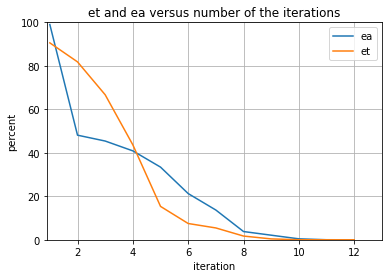

In [209]:
# plot ea and et

ea_list[0] = 99     #the first element is neglected.
x = iter_count_list
y1 = ea_list
y2 = et_list

plt.plot(x, y1)
plt.plot(x, y2)

plt.xlim(0.9, 13)
plt.ylim(0, 100)
plt.xlabel("iteration")
plt.ylabel("percent")

plt.title("et and ea versus number of the iterations")
plt.grid()
plt.legend(["ea", "et"], loc ="upper right")

plt.savefig("./src/imgs/A4_4_2.png", dpi=300)

plt.show()

## 4-4-a

### Fixed-point iteration 
to determine a root of $f(x) = -0.9x^2 + 1.7x + 2.5$ using $x_0 = 5.0$. Perform the computation until 𝜀𝑎 is less than 𝜀𝑠 = 0.01%. Also perform an error check of your final answer(plot the 𝜀𝑎 as the iteration growing)

![plot](./src/imgs/A4_4_a.jpg)

In [171]:
def g(x) :
    ans = math.sqrt((1.7 * x + 2.5) / 0.9)

    return ans

def fix_point(x0, es, iter_max, ea_list, iter_count_list) :
    x_root = x0
    iter_count = 0

    while True :
        last_x_root = x_root
        x_root = g(last_x_root)
        iter_count += 1
        iter_count_list.append(iter_count)

        if (x_root != 0) :
            ea = abs((x_root - last_x_root) / x_root) * 100
            ea_list.append(ea)

        print("iter time:", iter_count, ",ea =", ea)
        if (ea < es or iter_count >= iter_max) :
            return x_root

In [172]:
x0 = 5
es = 0.01
iter_max = 500
ea_list = []
iter_count_list = []

print("\nThe approximate ans:", fix_point(x0, es, iter_max, ea_list, iter_count_list))
# print(ea_list)
# print(iter_count)

iter time: 1 ,ea = 43.019388386838855
iter time: 2 ,ea = 14.140958348733184
iter time: 3 ,ea = 4.6679854963306715
iter time: 4 ,ea = 1.541483060629453
iter time: 5 ,ea = 0.5090321399985364
iter time: 6 ,ea = 0.16809099521169962
iter time: 7 ,ea = 0.05550608802781297
iter time: 8 ,ea = 0.01832887042630157
iter time: 9 ,ea = 0.006052438895087782

The approximate ans: 2.8601897496224673


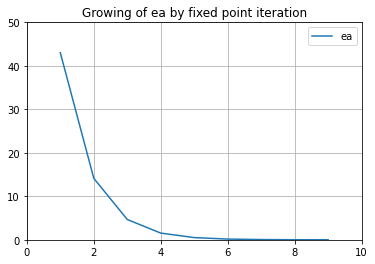

In [173]:
# plot

x = iter_count_list
y = ea_list

plt.plot(x, y)

plt.xlim(0, 10)
plt.ylim(0, 50)

plt.title("Growing of ea by fixed point iteration")
plt.grid()
plt.legend(["ea"], loc ="upper right")

plt.savefig("./src/imgs/A4_4_a.png", dpi=300)

plt.show()

### the Newton-Raphson method 
to determine a root of $f(x) = -0.9x^2 + 1.7x + 2.5$ using $x_0 = 5.0$. Perform the computation until 𝜀𝑎 is less than 𝜀𝑠 = 0.01%. Also perform an error check of your final answer(plot the 𝜀𝑎 as the iteration growing)

![plot](./src/imgs/A4_4_b.jpg)

In [167]:
def f(x) :
    ans = -0.9 * x ** 2 + 1.7 * x + 2.5

    return ans

def f_prime(x) :
    ans = -1.8 * x + 1.7

    return ans

def newton_raphson(x0, es, iter_max, ea_list, iter_count_list) :
    iter_count = 0

    while True :
        next_x = x0 - (f(x0) / f_prime(x0))
        x_root = next_x

        iter_count += 1
        iter_count_list.append(iter_count)

        ea = abs((x_root - x0) / x_root) * 100
        x0 = x_root
        ea_list.append(ea)
        

        print("iter time:", iter_count, ",ea =", ea)

        if (ea < es or iter_count >= iter_max) :
            return x_root

In [168]:
x0 = 5
es = 0.01
iter_max = 500
ea_list = []
iter_count_list = []

print("\nThe approximate ans:", newton_raphson(x0, es, iter_max, ea_list, iter_count_list))

iter time: 1 ,ea = 46.0
iter time: 2 ,ea = 17.108052750727655
iter time: 3 ,ea = 2.209254593287688
iter time: 4 ,ea = 0.03644225367328207
iter time: 5 ,ea = 9.913886563630006e-06

The approximate ans: 2.8601044055074283


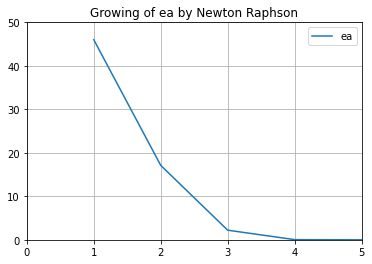

In [170]:
# plot

x = iter_count_list
y = ea_list

plt.plot(x, y)

plt.xlim(0, 5)
plt.ylim(0, 50)

plt.title("Growing of ea by Newton Raphson")
plt.grid()
plt.legend(["ea"], loc ="upper right")

plt.savefig("./src/imgs/A4_4_b.png", dpi=300)

plt.show()

## 4-5-1

Use the Newton-Raphson method to find the root of $f(x) = e^{-0.5x} (4 - x) - 2$

![plot](./src/imgs/A4_5_1.jpg)

## 4-5-2

Employ initial guesses of (a) 2, (b) 6, and (c) 8. Explain your results. (Python+解釋) Hint: Think about the problems of this method.

In [292]:
def f(x) :
    e = math.e
    ans = ((e ** (-0.5 * x)) * (4 - x)) - 2

    return ans

def f_prime(x) :
    e = math.e
    ans = (-0.5 * (e ** (-0.5 * x)) * (4 - x)) - (e ** (-0.5 * x))

    return ans

def newton_raphson(x0, es, iter_max) :
    iter_count = 0
    x_root = x0
    print("x0 =", x0)
    print()

    while True :
        last_x_root = x_root

        try :
            x_root = last_x_root - (f(x_root) / f_prime(x_root))
        except :
            print("total use", iter_count, "times.")
            return "Divergence"

        iter_count += 1
        iter_count_list.append(iter_count)
        if x_root != 0 :
            ea = abs((x_root - last_x_root) / x_root) * 100        

        print("iter time:", iter_count, ",ea =", ea, "root:", x_root)

        if (ea < es or iter_count >= iter_max) :
            print("total use", iter_count, "times.")
            return x_root

### a. $x_0 = 2$

In [293]:
x0 = 2
es = 0.01
iter_max = 500

print("\nThe approximate ans:", newton_raphson(x0, es, iter_max))

x0 = 2

iter time: 1 ,ea = 609.9293556607687 root: 0.2817181715409549
iter time: 2 ,ea = 63.73755414477369 root: 0.7768868450453745
iter time: 3 ,ea = 11.888408438696143 root: 0.8817078789285671
iter time: 4 ,ea = 0.4510949099401444 root: 0.8857032411666447
iter time: 5 ,ea = 0.0006278392363200894 root: 0.8857088019940231
total use 5 times.

The approximate ans: 0.8857088019940231


### b. $x_0 = 6$

In [294]:
x0 = 6
es = 0.01
iter_max = 500

print("\nThe approximate ans:", newton_raphson(x0, es, iter_max))

x0 = 6

total use 0 times.

The approximate ans: Divergence


### c. $x_0 = 8$

In [295]:
x0 = 8
es = 0.01
iter_max = 500

print("\nThe approximate ans:", newton_raphson(x0, es, iter_max))

x0 = 8

iter time: 1 ,ea = 93.39913842615294 root: 121.19630006628846
iter time: 2 ,ea = 100.0 root: 7.212131452880089e+24
total use 2 times.

The approximate ans: Divergence


## 4-6-1

If R = 3 m, what depth must the tank be filled to so that it holds 30 𝑚3?

![plot](./src//imgs/A4_6_1.jpg)


## 4-6-2

Newton-Raphson method (3 iterations; determine relative error after each iterations)(Python)


In [296]:
def f(h, R, V) :
    PI = math.pi
    ans = PI * (h ** 2) * (((3 * R) - h) / 3) - V

    return ans

def f_prime(h, R) :
    PI = math.pi
    ans = (2 * PI * h * R) - (PI * (h ** 2))

    return ans

def newton_raphson(x0, es, iter_max, R, V) :
    iter_count = 0
    x_root = x0
    print("x0 =", x0)
    print()

    while True :
        last_x_root = x_root

        try :
            x_root = last_x_root - (f(x_root, R, V) / f_prime(x_root, R))
        except :
            print("total use", iter_count, "times.")
            return "Divergence"

        iter_count += 1
        iter_count_list.append(iter_count)
        if x_root != 0 :
            ea = abs((x_root - last_x_root) / x_root) * 100        

        print("iter time:", iter_count, ",ea =", ea, "root:", x_root)

        if (ea < es or iter_count >= iter_max) :
            print("total use", iter_count, "times.")
            return x_root

In [302]:
R = 3
V = 30
x0 = R
es = 0.01
iter_max = 3

print("\nThe constrains of h:", newton_raphson(x0, es, iter_max, R, V))

x0 = 3

iter time: 1 ,ea = 45.55808019742351 root: 2.061032953945969
iter time: 2 ,ea = 1.6768713794196717 root: 2.0270420656974903
iter time: 3 ,ea = 0.0067262694875214685 root: 2.026905730555795
total use 3 times.

The constrains of h: 2.026905730555795


## 4-6-3

What are the constraints of h?

In [301]:
print("\nThe constrains of h:", newton_raphson(x0, es, iter_max, R, V))

x0 = 3

iter time: 1 ,ea = 45.55808019742351 root: 2.061032953945969
iter time: 2 ,ea = 1.6768713794196717 root: 2.0270420656974903
iter time: 3 ,ea = 0.0067262694875214685 root: 2.026905730555795
total use 3 times.

The constrains of h: 2.026905730555795


### 4-7

Please read section 7.4 and describe the idea of Muller’s method.

算是割線法的延伸，本想透過一直線通過函數到 x 軸的值來獲取數值解，不過 Muller's method 則做了修正，與割線法最大的不同就是透過「曲線」以曲線的性質變成透過第三個點來得到數值的分析解，作法則是用拋物線與 x 軸相交的點來得到數值解。

### 4-8

Read chapter 7.2.2 and explain how to remove a found root of an nth-order polynomial.


在迭代數次之後常會發現得到相同的解，因此在我們要進行迭代數次的時候可以從小數點進行著手，以減輕 round-off error 為目標使得結果不會離我們預期的太過遙遠。

使 round-off error 不會這麼影響我們的結果，便是要挑選好的估計值，有的時候我們需要從高次項著手，反之我們需要再低次項著手，在好的結果猜想中，所得到的結果可以使我們下次迭代中得到更好的結果，

另一種方法是在 deflaction 將獲得的連續根視為良好的初步猜測。然後可以將每個估計值用做初始猜測，再運用 nondeflated polynomial 判定，不過要小心如果兩個 deflacted root 不夠準確以至於收斂至一個解的時候，可能會發生錯誤的誤差發生，此時便要去比對每一個 polished root。

##### synthetic division
```
r = a(n)
a(n) = 0
DOFOR i = n−1, 0, −1
    s = a(i)
    a(i) = r r=s+r*t
END DO
```


##### Ploynomial deflaction
``` f90
SUB poldiv(a, n, d, m, q, r) 
    DOFOR j = 0, n
        r(j) = a(j)
        q(j) = 0 
    END DO
    DOFOR k = n−m, 0, −1 
        q(k+1) = r(m+k) ∕ d(m) 
        DOFOR j = m+k−1, k, −1
            r(j) = r(j)−q(k+1) * d(j−k) 
        END DO
    END DO
    DOFOR j = m, n
        r(j) = 0 
    END DO
    n = n−m 
END SUB
```

### 4-9

Please write Python codes to determine the height of temperature inversion? (data is in the eeclass)

In [4]:
""" Data type:
stno: Observation's Number (Length: 6 digits)
yyyymmddhh: UTC Time, yyyy: year, mm: month, dd: day, hh: hour (Length: 11 digits)
Si: Significant Code (Length: 3 digits)
Press: Pressure (Uint: hpa, Length: 7 digits)
Heigh: Geopotential Height (Unit: gpm, Length: 6 digits)
Tx: Temperature (Unit: degrees Celsius, Length: 6 digits)
Td: Dew Point (Unit: degrees Celsius, Length: 6 digits)
Wd: Wind Direction (Unit: degrees 360, Length: 4 digits)
Ws: Wind Speed (Unit: m/s, Length: 6 digits)
RH: Relative Humidity (Unit: %, Length: 4 digits)
"""

# Fetch the local path to read the info of the file.
data_path = os.getcwd()
file = "/src/data/20210101_upair.txt"
file_path = f"{data_path}/{file}"


data = pd.read_csv(file_path, skiprows=13, sep="\s+")
data = data.replace(-0.99, 0)
data = data.replace(-9.99, 0)
data = data.replace(-1   , 0)
# stno yyyymmddhh Si  Press Heigh    Tx    Td  Wd    Ws  RH
data.columns = ["stno", "date", "Si", "press", "heigh", "Tx", "Td", "Wd", "Ws", "Rh"]

print(data)

      stno        date  Si   press  heigh    Tx    Td   Wd    Ws  Rh
0   466920  2021010100   6  1010.7    137  10.6   5.0   94   5.1  68
1   466920  2021010100  10  1000.0    224  10.1   4.7   91   6.7  69
2   466920  2021010100   6   970.7    471   8.0   3.8   69   8.8  74
3   466920  2021010100   6   925.1    866   4.6   2.7   67  11.9  87
4   466920  2021010100  10   925.0    867   4.6   2.7   67  11.9  87
..     ...         ...  ..     ...    ...   ...   ...  ...   ...  ..
63  466920  2021010100   2    97.0  16676 -84.6 -90.9  260  37.3  34
64  466920  2021010100   2    87.8  17228 -85.0 -91.8  273  33.5  31
65  466920  2021010100   2    84.5  17444 -79.0 -88.1  281  30.2  22
66  466920  2021010100   6    82.3  17591 -79.4 -87.9  288  28.0  25
67  466920  2021010100  20    76.9  17983 -76.1 -85.9  263  26.2  21

[68 rows x 10 columns]


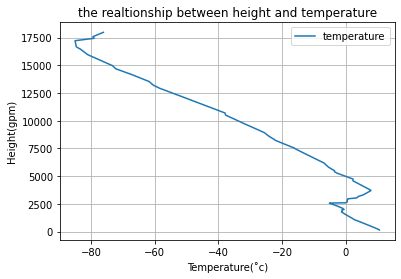

In [267]:
# At first we observe the realtionship between height and temperature

plt.plot(data["Tx"], data["heigh"])

plt.xlabel("Temperature(˚c)")
plt.ylabel("Height(gpm)")
plt.title("the realtionship between height and temperature")

plt.grid()
plt.legend(["temperature"], loc ="upper right")
plt.savefig("src/imgs/A4_9_1.jpg", dpi = 300)

plt.show()

Height: 1761 Temperature inversion: -1.3
Height: 1951 Temperature inversion: -1.2
Height: 2556 Temperature inversion: -5.1
Height: 2577 Temperature inversion: -3.8
Height: 2595 Temperature inversion: 0.0
Height: 2872 Temperature inversion: 0.5
Height: 2955 Temperature inversion: 0.7
Height: 3009 Temperature inversion: 2.6
Height: 3032 Temperature inversion: 3.5
Height: 3100 Temperature inversion: 3.7
Height: 3167 Temperature inversion: 4.0
Height: 3319 Temperature inversion: 5.6
Height: 3675 Temperature inversion: 7.8
Height: 17228 Temperature inversion: -85.0
Height: 17591 Temperature inversion: -79.4


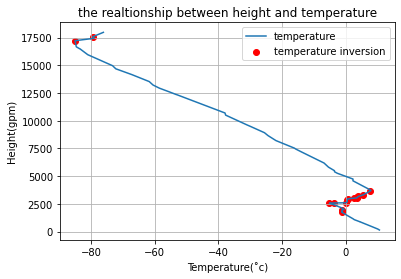

In [269]:
# the key point we need is height and the temperature

data_num = len(data)
inversion_happen = []
x = []
y = []

for i in range(0, data_num) :
    if (i == data_num - 1) :
        break

    if (data["Tx"][i] < data["Tx"][i + 1]) :
        inversion_happen.append(i)
        print("Height:", data["heigh"][i], "Temperature inversion:", data["Tx"][i])
        x.append(data["Tx"][i])
        y.append(data["heigh"][i])


plt.plot(data["Tx"], data["heigh"])
plt.scatter(x, y, c='red')

plt.xlabel("Temperature(˚c)")
plt.ylabel("Height(gpm)")
plt.title("the realtionship between height and temperature")

plt.grid()
plt.legend(["temperature", "temperature inversion"], loc ="upper right")
plt.savefig("src/imgs/A4_9_2.jpg", dpi = 300)

plt.show()

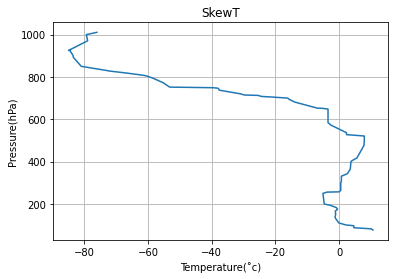

In [6]:
y = data["press"].iloc[::-1]
plt.plot(data["Tx"], y)
plt.xlabel("Temperature(˚c)")
plt.ylabel("Pressure(hPa)")
plt.title("SkewT")

plt.grid()
# plt.legend(["temperature", "temperature inversion"], loc ="upper right")
plt.savefig("src/imgs/A4_9_3.jpg", dpi = 300)

plt.show()